In [34]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lib.residental_data_source import ResidentialDataSource


## Создание датасета

В файле converter.py

In [35]:
data_source = ResidentialDataSource('src/merged_inner.xlsx')
data_set = data_source.fetch_data_set()

In [36]:
data_set.head()

,Unnamed: 0.1,Unnamed: 0,index(),Регион,Населенный пункт,Группа компаний,ID проекта,Проект,Корпус,Класс недвижимости,...,Внутренний двор без машин,Вид из окна на море,Дата сбора информации,"Общая сумма полученных денег с проданных квартир, руб",Количество проданных машиномест,Количество проданных квартир,Общая площадь проданных квартир,Процент распроданности,Кумулятивная средняя стоимость кв.метра,Количество проданных нежилых помещений
0,0,253,254,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,254,255,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,255,256,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,256,257,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,257,258,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ds = data_set.copy()

columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'index()', 'Продано квартир, м2', 'Продано квартир, руб','Unnamed: 18']
ds.drop(columns=columns_to_drop, inplace=True)

print('Размер выборки: {}, {}'.format(ds.shape[0], ds.shape[1]))
ds.head()

Размер выборки: 1607, 118


,Регион,Населенный пункт,Группа компаний,ID проекта,Проект,Корпус,Класс недвижимости,Статус,Месяц,"Продано квартир, шт",...,Внутренний двор без машин,Вид из окна на море,Дата сбора информации,"Общая сумма полученных денег с проданных квартир, руб",Количество проданных машиномест,Количество проданных квартир,Общая площадь проданных квартир,Процент распроданности,Кумулятивная средняя стоимость кв.метра,Количество проданных нежилых помещений
0,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Апрель 2021,0.0,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Май 2021,0.0,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Июнь 2021,0.0,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Июль 2021,0.0,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Август 2021,1.0,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Разведочный анализ данных


## Data Preparation

In [38]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Columns: 118 entries, Регион to Количество проданных нежилых помещений
dtypes: float64(27), int64(38), object(53)
memory usage: 1.4+ MB


In [39]:
ds[ds.duplicated()]

,Регион,Населенный пункт,Группа компаний,ID проекта,Проект,Корпус,Класс недвижимости,Статус,Месяц,"Продано квартир, шт",...,Внутренний двор без машин,Вид из окна на море,Дата сбора информации,"Общая сумма полученных денег с проданных квартир, руб",Количество проданных машиномест,Количество проданных квартир,Общая площадь проданных квартир,Процент распроданности,Кумулятивная средняя стоимость кв.метра,Количество проданных нежилых помещений


### Обработка типов данных

In [40]:
ds.dtypes

Регион                                                    object
Населенный пункт                                          object
Группа компаний                                           object
ID проекта                                                 int64
Проект                                                    object
Корпус                                                     int64
Класс недвижимости                                        object
Статус                                                    object
Месяц                                                     object
Продано квартир, шт                                      float64
Продано нежилых, шт                                      float64
Продано нежилых, м2                                      float64
Продано нежилых, руб                                     float64
Продано машиномест, шт                                   float64
Продано машиномест, м2                                   float64
Продано машиномест, руб  

### Подозрительные типы данных:

### изменить на float

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Общая площадь квартир                                | <span style="color:blue">object</span>   |
| Общая площадь земельного участка                     | <span style="color:blue">object</span>   |

### изменить на date

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Дата получения РС                                     | <span style="color:blue">object</span>   |
| Дата публикации ИНС                                   | <span style="color:blue">object</span>   |
| Дата сбора информации                                 | <span style="color:blue">object</span>   |

### изменить на float

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Широта                                                | <span style="color:blue">float64</span>  |
| Долгота                                               | <span style="color:blue">object</span>   |

### проверить уникальные, изменить на int/float

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Расстояние по навигатору до: Луговая                  | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Центр                    | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Первая речка             | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Вторая речка             | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Третья рабочая           | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Окатовая                 | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Баляева                  | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Кампус ДВФУ              | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Артем                    | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: В-надеждинское           | <span style="color:blue">int64</span>    |

### проверить уникальные

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Вид из окна на море                                   | <span style="color:blue">float64</span>  |


In [41]:
float_col =  ['Общая площадь квартир', 'Общая площадь земельного участка']
for col in float_col:
    ds[col] = pd.to_numeric(ds[col], errors='coerce')


In [42]:
date_col =  ['Дата получения РС', 'Дата публикации ИНС', 'Дата сбора информации']
for col in date_col:
    ds[col] = pd.to_datetime(ds[col], dayfirst=True, errors='coerce')

In [43]:
ds['Долгота'] = ds['Долгота'].astype('float64')

In [44]:
int_float_columns = {
        'Расстояние по навигатору до: Луговая': 'int64',
        'Расстояние по навигатору до: Центр': 'float64',
        'Расстояние по навигатору до: Первая речка': 'float64',
        'Расстояние по навигатору до: Вторая речка': 'int64',
        'Расстояние по навигатору до: Третья рабочая': 'float64',
        'Расстояние по навигатору до: Окатовая': 'int64',
        'Расстояние по навигатору до: Баляева': 'float64',
        'Расстояние по навигатору до: Кампус ДВФУ': 'int64',
        'Расстояние по навигатору до: Артем': 'int64',
        'Расстояние по навигатору до: В-надеждинское': 'int64'
    }
for col in int_float_columns:
    print(ds[col].value_counts())

Расстояние по навигатору до: Луговая
4     260
10    237
5     231
9     145
6     102
8      87
3      79
35     61
19     55
55     51
27     48
33     33
25     28
28     24
15     20
1      20
2      20
21     20
12     20
45     20
16     20
14     10
24      8
20      8
Name: count, dtype: int64
Расстояние по навигатору до: Центр
10.0    337
9.0     191
11.0    155
6.0     111
12.0     98
13.0     92
14.0     56
18.0     55
7.0      54
49.0     51
29.0     51
2.0      40
5.0      37
25.0     36
26.0     36
27.0     33
4.0      30
2.5      20
8.0      20
39.0     20
19.0     20
28.0     18
16.0     16
24.0     10
33.0     10
3.0      10
Name: count, dtype: int64
Расстояние по навигатору до: Первая речка
8.0     287
10.0    174
7.0     166
9.0     134
6.0     124
4.0      99
14.0     74
23.0     72
13.0     64
15.0     55
42.0     51
27.0     51
2.0      40
5.0      39
11.0     36
24.0     33
36.0     20
0.4      20
17.0     20
25.0     18
21.0     10
29.0     10
1.0      10
Name: 

Замечание: почти все значения расстояний - это целые значения. Тогда приведем к типу данных int64 все колонки из списка.

In [45]:
int_columns = {
    'Расстояние по навигатору до: Центр': 'float64',
    'Расстояние по навигатору до: Первая речка': 'float64',
    'Расстояние по навигатору до: Третья рабочая': 'float64',
    'Расстояние по навигатору до: Баляева': 'float64'
}

for col in int_columns:
    ds[col] = ds[col].astype('int64')

In [46]:
ds['Вид из окна на море'].value_counts()

Вид из окна на море
0.0    1261
2.0     120
1.0     112
0.5      48
3.0      46
2.5      20
Name: count, dtype: int64

### Исследование пропущенных значений

<Axes: >

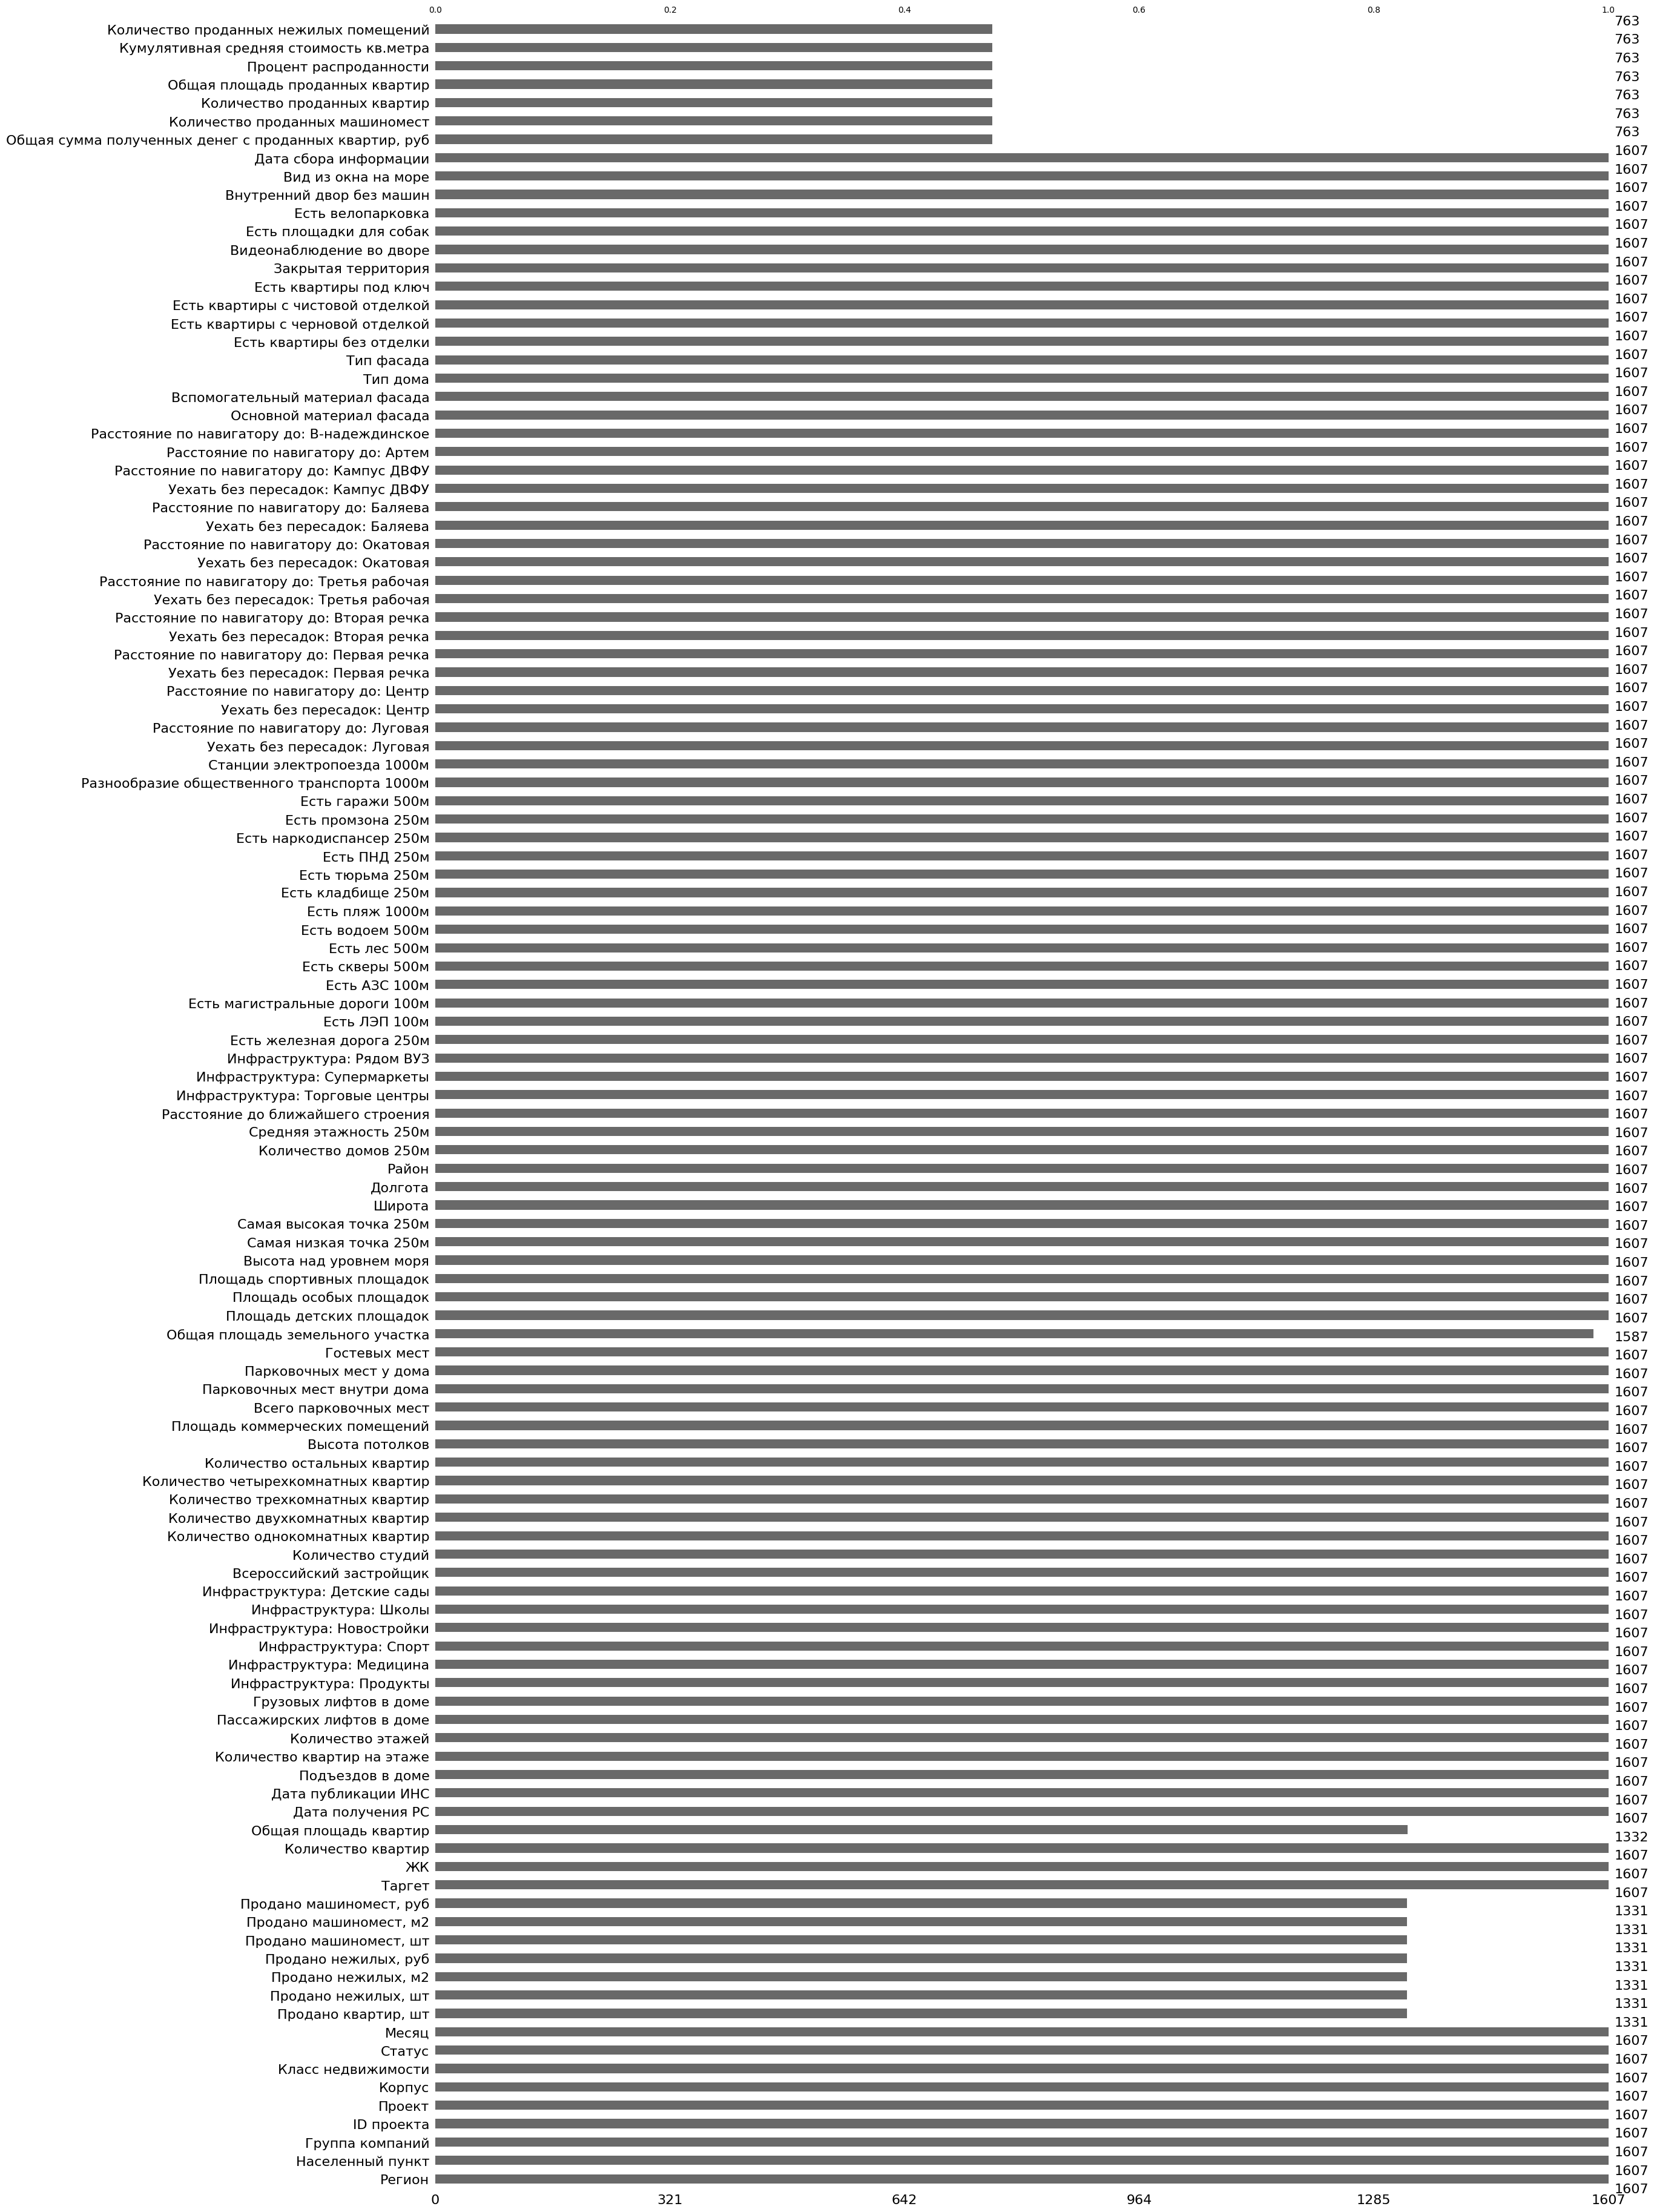

In [47]:
msno.bar(ds)

<Axes: >

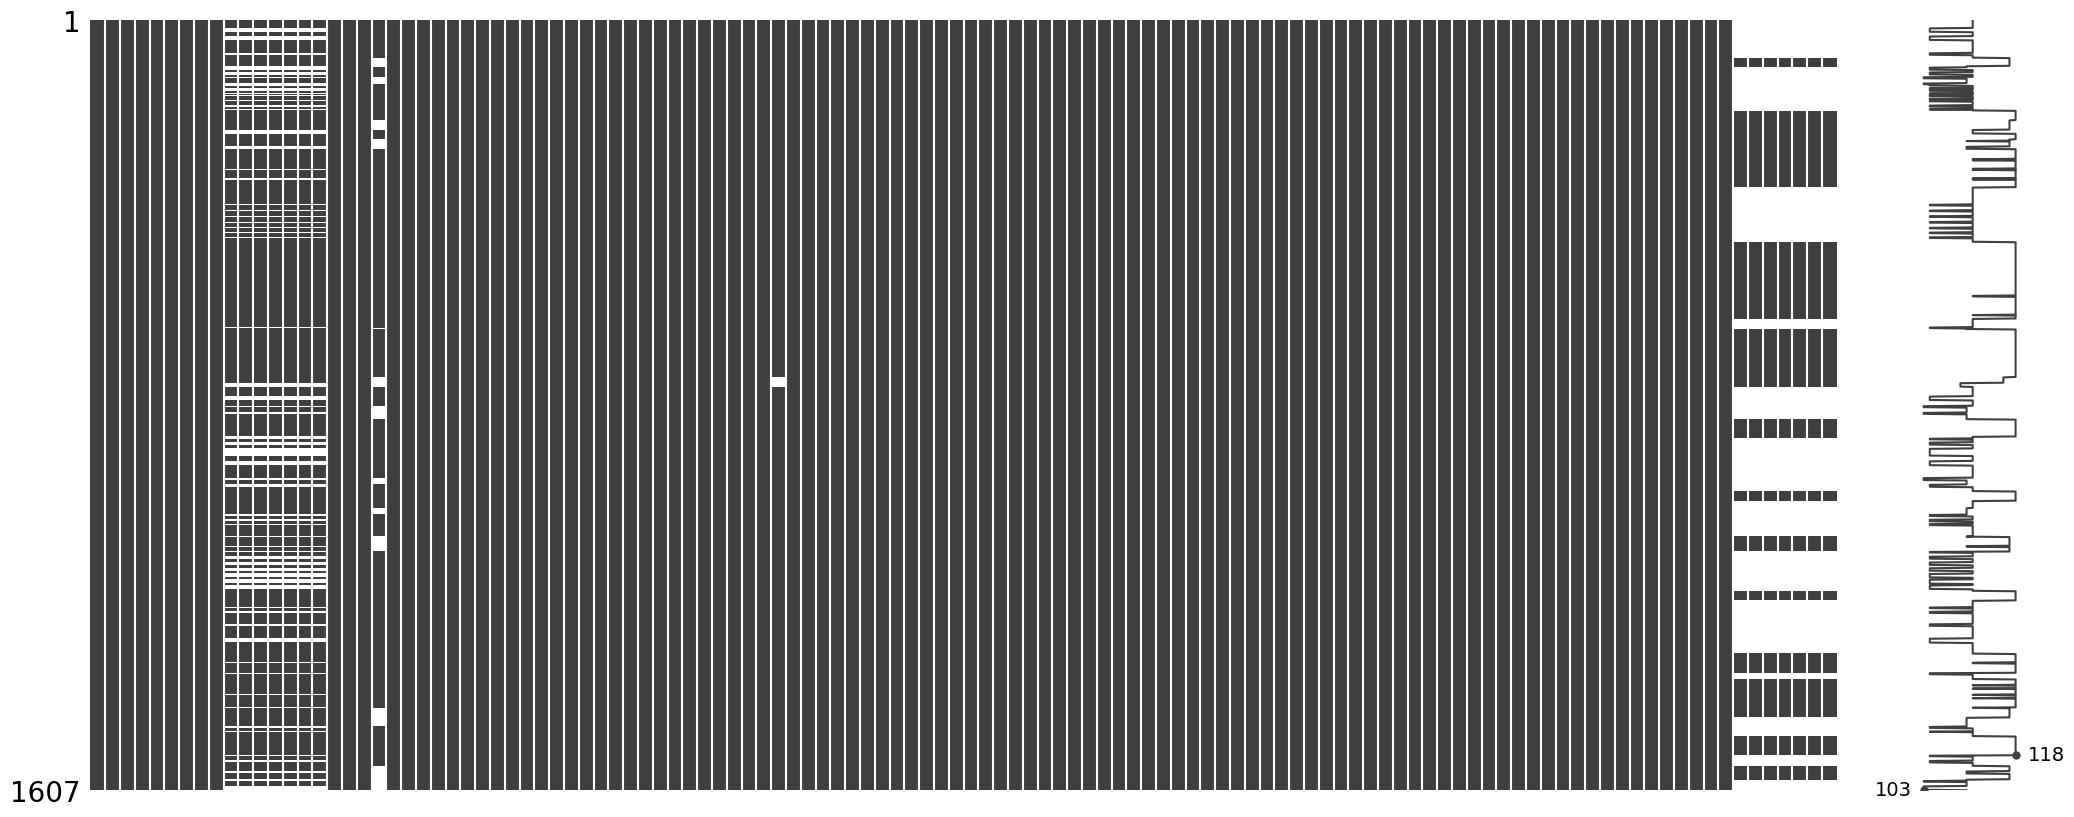

In [48]:
msno.matrix(ds)

In [49]:
# Процент пропущенных значений в каждом столбце

def missing_values(data_set):
    missing_values = (data_set.isna().sum() / len(data_set) * 100).sort_values()
    missing_values_df = pd.DataFrame(missing_values)
    pd.set_option('display.max_rows', len(missing_values_df))
    return missing_values_df

missing_values(ds)

,0
Регион,0.000000
Населенный пункт,0.000000
Группа компаний,0.000000
ID проекта,0.000000
Проект,0.000000
Корпус,0.000000
Класс недвижимости,0.000000
Статус,0.000000
Месяц,0.000000
Количество квартир на этаже,0.000000


In [67]:
pd.set_option('display.max_rows', len(ds))
missing_values = ds.isnull().sum()
missing_values

Регион                                                     0
Населенный пункт                                           0
Группа компаний                                            0
ID проекта                                                 0
Проект                                                     0
Корпус                                                     0
Класс недвижимости                                         0
Статус                                                     0
Месяц                                                      0
Продано квартир, шт                                      276
Продано нежилых, шт                                      277
Продано нежилых, м2                                      277
Продано нежилых, руб                                      48
Продано машиномест, шт                                   279
Продано машиномест, м2                                   279
Продано машиномест, руб                                   48
Таргет                  

In [50]:
def useful_rows(df):
    print('Полность заполненные объекты: ', len(df.dropna()))
    print('Процент полностью заполненных объектов: ', round(len(df.dropna()) / len(df) * 100, 2))

useful_rows(ds)

Полность заполненные объекты:  572
Процент полностью заполненных объектов:  35.59


### Краткий вывод

Большинство столбцов не имеют пропущенных значений. Пропуски наблюдаются только в столбцах по продажам.

##  Data Cleaning 



In [51]:
# Функция для визуализации гистограммы и boxplot

def visualize_distribution(dataset, columns):

    for col in columns:
        
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(dataset[col], kde=True, bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Гистограмма {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Частота', fontsize=12)

        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataset[col], color='lightblue')
        plt.title(f'Boxplot {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)

        plt.tight_layout()
        plt.show()

In [ ]:
columns = [
    'Общая площадь земельного участка',
    'Общая площадь квартир',
    'Продано нежилых, м2',
    'Продано машиномест, руб',
    'Продано машиномест, шт',
    'Продано машиномест, м2',
    'Продано квартир, шт',
    'Продано нежилых, шт',
    'Продано нежилых, руб',
    'Общая сумма полученных денег с проданных квартир, руб',
    'Количество проданных машиномест',
    'Количество проданных квартир',
    'Общая площадь проданных квартир',
    'Процент распроданности',
    'Кумулятивная средняя стоимость кв.метра',
    'Количество проданных нежилых помещений'
]

visualize_distribution(ds, columns)

Для данных с нормальным распределением и длиным правым хвостом следует применить логарифмирование, для других столбцов исправить выбросы и заполнить пропуски средним или медианой. 

In [62]:
columns_to_fill = [
    'Продано нежилых, м2',
    'Продано машиномест, руб',
    'Продано машиномест, шт',
    'Продано машиномест, м2',
    'Продано квартир, шт',
    'Продано нежилых, шт',
    'Продано нежилых, руб',
    'Общая сумма полученных денег с проданных квартир, руб',
    'Количество проданных машиномест',
    'Количество проданных квартир',
    'Общая площадь проданных квартир',
    'Процент распроданности',
    'Кумулятивная средняя стоимость кв.метра',
    'Количество проданных нежилых помещений']


for column in columns_to_fill:
    ds[column] = ds[column].apply(lambda x: np.nan if x < 0 else x)

    log_col = np.log1p(ds[column] + 1)
    #print(ds[column].describe().apply(lambda x: f"{x: .3f}"))


In [54]:
# for column in columns_to_fill:
#     median_value = ds[column].median()
#     ds[column] = ds[column].fillna(median_value, inplace=True)

In [55]:
columns_to_fill = [    
    'Общая площадь земельного участка',
    'Общая площадь квартир']

for column in columns_to_fill: 
    mean_value = ds[column].mean()
    ds[column] = ds[column].fillna(mean_value)
    print(ds[column].describe().apply(lambda x: f"{x: .3f}"))


count      1587.000
mean       9333.021
std        6495.003
min        1800.000
25%        5241.000
50%        8052.000
75%       11276.000
max       35198.000
Name: Общая площадь земельного участка, dtype: object
count      1332.000
mean      10291.176
std        5926.647
min        1219.000
25%        6024.000
50%       11087.000
75%       12635.000
max       35741.000
Name: Общая площадь квартир, dtype: object


In [57]:
monetary_columns = ['Продано нежилых, руб', 'Продано машиномест, руб']

for column in monetary_columns:
    # применение интерполяции в каждой группе
    ds[column] = ds.groupby('Группа компаний')[column].apply(lambda group: group.interpolate()).reset_index(level=0, drop=True)



In [58]:
# ds['Таргет'] = ds['Таргет'].replace(0, np.nan)

## Аномалии и выбросы

In [80]:
def calculate_outliers(df, columns):
    boundaries_dict = {}
    
    for column in columns:
        q15 = df[column].quantile(0.15)
        q85 = df[column].quantile(0.85)
        iqr = q85 - q15
        lower_bound = q15 - 1.5 * iqr
        upper_bound = q85 + 1.5 * iqr
        
        print(f"Столбец: {column}")
        print(f"Нижняя граница: {lower_bound}")
        print(f"Верхняя граница: {upper_bound}")

        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        print(f"Количество выбросов: {outliers.sum()}\n")

        boundaries_dict[column] = (lower_bound, upper_bound)
    
    return boundaries_dict

In [77]:
calculate_outliers(ds, columns)

Столбец: Общая площадь земельного участка
Нижняя граница: -12006.0
Верхняя граница: 29802.0
Количество выбросов: 48

Столбец: Общая площадь квартир
Нижняя граница: -8185.0
Верхняя граница: 25847.0
Количество выбросов: 28

Столбец: Продано нежилых, м2
Нижняя граница: 0.0
Верхняя граница: 0.0
Количество выбросов: 169

Столбец: Продано машиномест, руб
Нижняя граница: 0.0
Верхняя граница: 0.0
Количество выбросов: 188

Столбец: Продано машиномест, шт
Нижняя граница: 0.0
Верхняя граница: 0.0
Количество выбросов: 167

Столбец: Продано машиномест, м2
Нижняя граница: 0.0
Верхняя граница: 0.0
Количество выбросов: 167

Столбец: Продано квартир, шт
Нижняя граница: -16.5
Верхняя граница: 27.5
Количество выбросов: 28

Столбец: Продано нежилых, шт
Нижняя граница: 0.0
Верхняя граница: 0.0
Количество выбросов: 169

Столбец: Продано нежилых, руб
Нижняя граница: -330224.99999999994
Верхняя граница: 550374.9999999999
Количество выбросов: 157

Столбец: Общая сумма полученных денег с проданных квартир, руб


Так как это значения продаж, выбросы можно заменять на верхнюю границу, считаем, что продажи не могут быть отрицательные.
Обратить внимание на то, что в некоторых характеристиках процент выбросов ~9%. Это допустимо, но лучше выставлять квантили таким образом, чтобы процент выбросов не превышал 5%. 

In [83]:
def replace_outliers(df, columns):
    boundaries_dict = calculate_outliers(df, columns)
    
    for column in columns:
        lower_bound, upper_bound = boundaries_dict[column]
        
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)


In [84]:
replace_outliers(ds, columns)

Столбец: Общая площадь земельного участка
Нижняя граница: -12006.0
Верхняя граница: 29802.0
Количество выбросов: 0

Столбец: Общая площадь квартир
Нижняя граница: -8185.0
Верхняя граница: 25847.0
Количество выбросов: 0

Столбец: Продано нежилых, м2
Нижняя граница: 0.0
Верхняя граница: 0.0
Количество выбросов: 0

Столбец: Продано машиномест, руб
Нижняя граница: 0.0
Верхняя граница: 0.0
Количество выбросов: 0

Столбец: Продано машиномест, шт
Нижняя граница: 0.0
Верхняя граница: 0.0
Количество выбросов: 0

Столбец: Продано машиномест, м2
Нижняя граница: 0.0
Верхняя граница: 0.0
Количество выбросов: 0

Столбец: Продано квартир, шт
Нижняя граница: -16.5
Верхняя граница: 27.5
Количество выбросов: 0

Столбец: Продано нежилых, шт
Нижняя граница: 0.0
Верхняя граница: 0.0
Количество выбросов: 0

Столбец: Продано нежилых, руб
Нижняя граница: -330224.99999999994
Верхняя граница: 550374.9999999999
Количество выбросов: 0

Столбец: Общая сумма полученных денег с проданных квартир, руб
Нижняя граница: